In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Handling
import datetime

# File System Operations
import os

In [2]:
# File name only
file_name = "imdb_top_1000.csv"

# Load the dataset (file must be in the current working directory)
df = pd.read_csv(file_name)

# Perform EDA
print("\nInitial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [5]:
# List of columns to remove
columns_to_remove = ['Poster_Link', 'Released_Year', 'Certificate', 'Runtime', 'Overview','No_of_Votes','Gross']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Verify the changes
print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series_Title  1000 non-null   object 
 1   Genre         1000 non-null   object 
 2   IMDB_Rating   1000 non-null   float64
 3   Meta_score    843 non-null    float64
 4   Director      1000 non-null   object 
 5   Star1         1000 non-null   object 
 6   Star2         1000 non-null   object 
 7   Star3         1000 non-null   object 
 8   Star4         1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB
None

Preview of Updated DataFrame:


,Series_Title,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [7]:
df = df.rename(columns={'Series_Title': 'Titles'})

print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
 3   Meta_score   843 non-null    float64
 4   Director     1000 non-null   object 
 5   Star1        1000 non-null   object 
 6   Star2        1000 non-null   object 
 7   Star3        1000 non-null   object 
 8   Star4        1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB
None

Preview of Updated DataFrame:


,Titles,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [8]:
# 1. Check for null or missing values
print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

# 2. Check for duplicate rows
print("\nChecking for Duplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Display updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
Titles           0
Genre            0
IMDB_Rating      0
Meta_score     157
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
dtype: int64

Checking for Duplicate Rows:
Number of duplicate rows: 0

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
 3   Meta_score   843 non-null    float64
 4   Director     1000 non-null   object 
 5   Star1        1000 non-null   object 
 6   Star2        1000 non-null   object 
 7   Star3        1000 non-null   object 
 8   Star4        1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 78.1+ KB


In [10]:
from sklearn.impute import KNNImputer

# Assuming your DataFrame is named 'df' and the 'score' column has missing values

# 1. Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors for imputation

# 2. Select the column with missing values
X = df[['Meta_score']] 

# 3. Fit and transform the data
X_imputed = imputer.fit_transform(X)

# 4. Replace the original column with the imputed values
df['Meta_score'] = X_imputed

# Now, the 'score' column in your DataFrame will have the missing values imputed using KNN.

print("\nChecking for Null Values:")
print(df.isnull().sum())  # Count of missing values in each column

print("\nUpdated Dataset Info:")
df.info()


Checking for Null Values:
Titles         0
Genre          0
IMDB_Rating    0
Meta_score     0
Director       0
Star1          0
Star2          0
Star3          0
Star4          0
dtype: int64

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
 3   Meta_score   1000 non-null   float64
 4   Director     1000 non-null   object 
 5   Star1        1000 non-null   object 
 6   Star2        1000 non-null   object 
 7   Star3        1000 non-null   object 
 8   Star4        1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 78.1+ KB


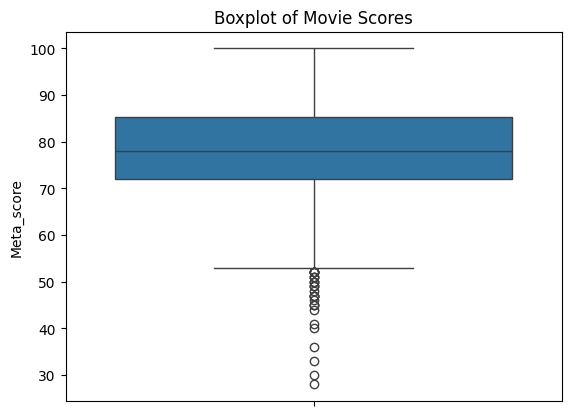

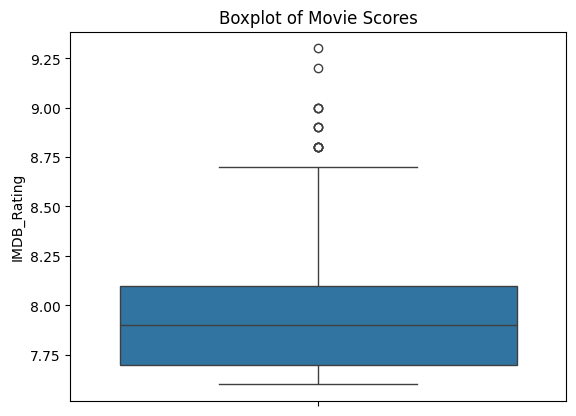

In [11]:
sns.boxplot(df['Meta_score'])
plt.title("Boxplot of Movie Scores")
plt.show()

sns.boxplot(df['IMDB_Rating'])
plt.title("Boxplot of Movie Scores")
plt.show()

In [12]:
from scipy.stats.mstats import winsorize

# Apply Winsorization on the 'score' column
# Winsorize the data: limits=(lower limit, upper limit) as percentages
df['Meta_score'] = winsorize(df['Meta_score'], limits=(0.05, 0.05))  # Trims 5% from both ends

print("\nWinsorized Data Info:")
print(df.describe())


Winsorized Data Info:
       IMDB_Rating   Meta_score
count  1000.000000  1000.000000
mean      7.949300    78.303530
std       0.275491    10.136604
min       7.600000    58.000000
25%       7.700000    72.000000
50%       7.900000    77.971530
75%       8.100000    85.250000
max       9.300000    96.000000


E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


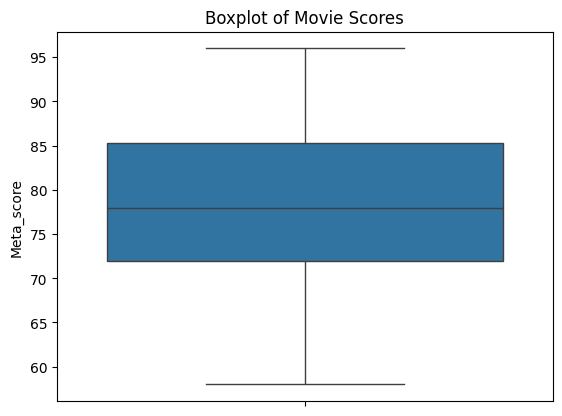

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
 3   Meta_score   1000 non-null   float64
 4   Director     1000 non-null   object 
 5   Star1        1000 non-null   object 
 6   Star2        1000 non-null   object 
 7   Star3        1000 non-null   object 
 8   Star4        1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 78.1+ KB


In [13]:
sns.boxplot(df['Meta_score'])
plt.title("Boxplot of Movie Scores")
plt.show()

df.info()

In [16]:
df = df.rename(columns={'Genre': 'genre'})
df = df.rename(columns={'Meta_score': 'score'})
print("Updated DataFrame Info:")
print(df.info())
print("\nPreview of Updated DataFrame:")
df.head()

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       1000 non-null   object 
 1   genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
 3   score        1000 non-null   float64
 4   Director     1000 non-null   object 
 5   Star1        1000 non-null   object 
 6   Star2        1000 non-null   object 
 7   Star3        1000 non-null   object 
 8   Star4        1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 78.1+ KB
None

Preview of Updated DataFrame:


,Titles,genre,IMDB_Rating,score,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,"Crime, Drama",9.2,96.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [19]:
df = df.rename(columns={'IMDB_Rating': 'Rating'})
df.head()

,Titles,genre,Rating,score,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,"Crime, Drama",9.2,96.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [20]:
# Save the cleaned DataFrame
df.to_csv('Cleaned_imdb_top_1000.csv', index=False)